<a href="https://colab.research.google.com/github/thaparjeeya786/loan_approval_prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (20, 12)
   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0    Male     Yes          0      Graduate            No             5849   
1  Female      No          1      Graduate           Yes             4583   
2    Male     Yes          0  Not Graduate            No             3000   
3    Male     Yes          2      Graduate            No             6000   
4  Female      No          0      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0         128               360               1   
1               1508         128               360               1   
2                  0          66               360               1   
3                  0         120               360               1   
4               4196         141               360               1   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2 

/tmp/ipython-input-1580805740.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="Set2")


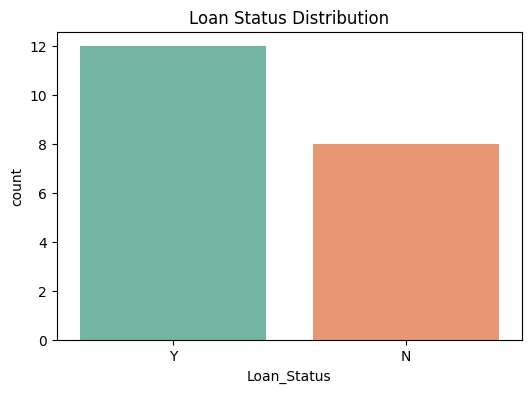

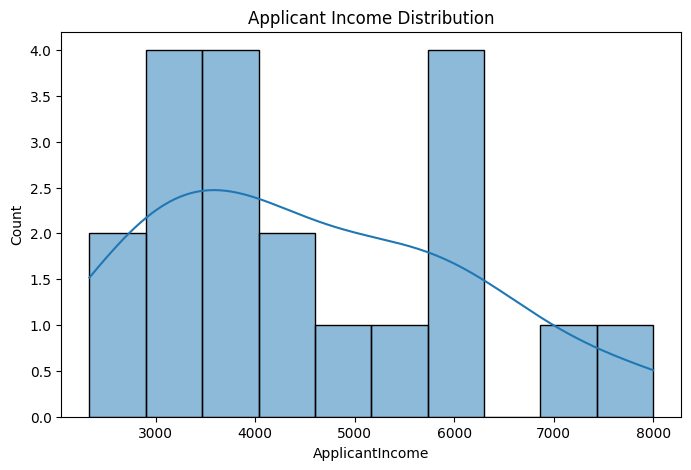


Training shape: (15, 11)
Testing shape: (5, 11)

Logistic Regression Results:
Accuracy: 0.8
Confusion Matrix:
 [[2 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5


Decision Tree Results:
Accuracy: 0.8
Confusion Matrix:
 [[2 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5


Random Forest Results:
Accuracy: 0.6
Confusion Matrix:
 [[1 1]
 [1 2]]
Classification Report:
    

/tmp/ipython-input-1580805740.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")


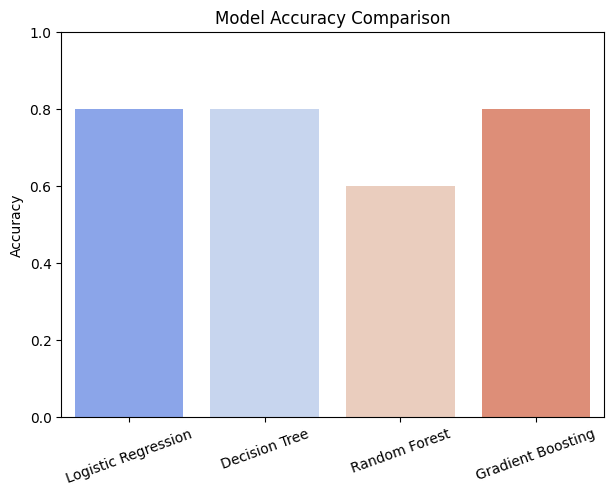

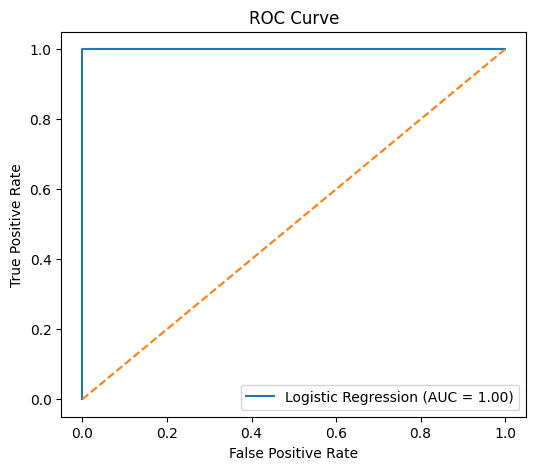


Best Model: Logistic Regression

Custom Applicant Loan Prediction: ✅ Approved


In [3]:
# ----------------------------------------------
# Loan Approval Prediction (Classification Project)
# Predefined dataset (no external download needed)
# ----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# -----------------------------
# 1. Create Predefined Dataset
# -----------------------------
data = {
    "Gender": ["Male","Female","Male","Male","Female","Male","Female","Male","Female","Male",
               "Male","Female","Male","Male","Female","Male","Female","Male","Male","Female"],
    "Married": ["Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","No",
                "Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","No"],
    "Dependents": ["0","1","0","2","0","1","0","3+","0","2",
                   "0","1","2","0","0","1","2","0","3+","0"],
    "Education": ["Graduate","Graduate","Not Graduate","Graduate","Graduate","Not Graduate",
                  "Graduate","Graduate","Not Graduate","Graduate","Graduate","Graduate",
                  "Graduate","Not Graduate","Graduate","Graduate","Not Graduate","Graduate","Graduate","Graduate"],
    "Self_Employed": ["No","Yes","No","No","Yes","No","No","Yes","No","No",
                      "Yes","No","No","No","Yes","No","No","Yes","No","No"],
    "ApplicantIncome": [5849,4583,3000,6000,5417,2333,4000,6000,3500,4500,
                        3200,5000,8000,2500,4000,3600,2900,7200,6100,3300],
    "CoapplicantIncome": [0,1508,0,0,4196,1516,1200,0,1500,0,
                          0,1800,0,0,2100,0,0,0,1500,0],
    "LoanAmount": [128,128,66,120,141,95,100,160,110,130,
                   115,105,200,80,130,100,90,220,150,100],
    "Loan_Amount_Term": [360,360,360,360,360,360,360,360,360,360,
                         360,360,360,360,360,360,360,360,360,360],
    "Credit_History": [1,1,1,1,1,1,0,1,1,1,
                       1,0,1,1,1,1,0,1,1,1],
    "Property_Area": ["Urban","Rural","Urban","Urban","Urban","Urban","Rural","Semiurban","Urban","Rural",
                      "Semiurban","Urban","Urban","Rural","Urban","Semiurban","Urban","Urban","Semiurban","Urban"],
    "Loan_Status": ["Y","N","Y","Y","Y","N","N","Y","Y","N",
                    "Y","N","Y","N","Y","Y","N","Y","Y","N"]
}

df = pd.DataFrame(data)

print("Dataset shape:", df.shape)
print(df.head())

# -----------------------------
# 2. Exploratory Data Analysis
# -----------------------------
print("\nClass Balance:")
print(df["Loan_Status"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Loan_Status", data=df, palette="Set2")
plt.title("Loan Status Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["ApplicantIncome"], bins=10, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# -----------------------------
# 3. Data Preprocessing
# -----------------------------
# Encode categorical variables
categorical_cols = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Features & Labels
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Scale numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print("\nTraining shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# -----------------------------
# 4. Train Multiple Models
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 5. Model Comparison
# -----------------------------
plt.figure(figsize=(7,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=20)
plt.show()

# -----------------------------
# 6. ROC Curve for Best Model
# -----------------------------
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_prob = best_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("\nBest Model:", best_model_name)

# -----------------------------
# 7. Custom Prediction
# -----------------------------
sample = pd.DataFrame([{
    "Gender": 1,          # 0=Female, 1=Male
    "Married": 1,         # 0=No, 1=Yes
    "Dependents": 0,      # encoded
    "Education": 0,       # 0=Graduate, 1=Not Graduate
    "Self_Employed": 0,   # 0=No, 1=Yes
    "ApplicantIncome": 5000,
    "CoapplicantIncome": 1500,
    "LoanAmount": 120,
    "Loan_Amount_Term": 360,
    "Credit_History": 1,
    "Property_Area": 2    # 0=Rural,1=Semiurban,2=Urban
}])

sample_scaled = scaler.transform(sample)
pred = best_model.predict(sample_scaled)[0]
print("\nCustom Applicant Loan Prediction:", "✅ Approved" if pred==1 else "❌ Rejected")

In [4]:
!git config --global user.name "thaparjeeya786"
!git config --global user.email "thaparjeeya786@gmail.com"


In [5]:
!git init


Reinitialized existing Git repository in /content/.git/


In [6]:
!echo "# loan_approval_prediction" >> README.md


In [7]:
!git add .


In [8]:
!git commit -m "first commit"


[master (root-commit) dddcf96] first commit
 22 files changed, 51026 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.10.03/13.35.25.672721.log
 create mode 100644 .config/logs/2025.10.03/13.35.53.232428.log
 create mode 100644 .config/logs/2025.10.03/13.36.02.371883.log
 create mode 100644 .config/logs/2025.10.03/13.36.07.502768.log
 create mode 100644 .config/logs/2025.10.03/13.36.16.394866.log
 create mode 100644 .config/logs/2025.10.03/13.36.17.108654.log
 create mode 100644 README.md
 create mode 100755 sample_data

In [9]:
!git branch -M main


In [10]:
!git remote add origin https://github.com/thaparjeeya786/loan_approval_prediction.git


In [11]:
!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address
